(500, 2)
(500,)


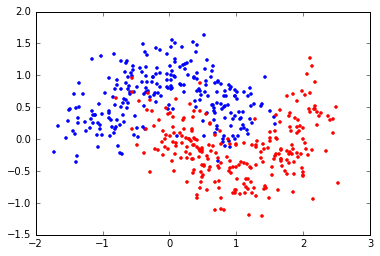

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore",category=DeprecationWarning)

from sklearn import datasets
from polyssifier import Poly
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

%matplotlib inline
data, label = make_moons(n_samples=500, noise=0.3)
print(data.shape)
print(label.shape)

plt.plot(data[label==0,0], data[label==0,1],'.');
plt.plot(data[label==1,0], data[label==1,1],'r.');

In [3]:
# single class example
pol = Poly(data,label, n_folds=10, verbose=1, feature_selection=False)
scores= pol.run()


INFO:polyssifier.polyssifier:Fold 1
INFO:polyssifier.polyssifier:Loading models/Multilayer Perceptron_1.p
INFO:polyssifier.polyssifier:Multilayer Perceptron    :  Train 0.92, 4.01 sec
INFO:polyssifier.polyssifier:Loading models/Random Forest_1.p
INFO:polyssifier.polyssifier:Random Forest            :  Train 0.93, 0.02 sec
INFO:polyssifier.polyssifier:Loading models/SVM_1.p
INFO:polyssifier.polyssifier:SVM                      :  Train 0.92, 0.01 sec
INFO:polyssifier.polyssifier:Loading models/Nearest Neighbors_1.p
INFO:polyssifier.polyssifier:Nearest Neighbors        :  Train 0.93, 0.01 sec
INFO:polyssifier.polyssifier:Loading models/Decision Tree_1.p
INFO:polyssifier.polyssifier:Decision Tree            :  Train 0.88, 0.00 sec
INFO:polyssifier.polyssifier:Loading models/Logistic Regression_1.p
INFO:polyssifier.polyssifier:Logistic Regression      :  Train 0.86, 0.00 sec
INFO:polyssifier.polyssifier:Loading models/Naive Bayes_1.p
INFO:polyssifier.polyssifier:Naive Bayes              : 

                       Train score  Train std  Test score  Test std
classifier                                                         
Voting                    0.925066   0.007324    0.927639  0.023562
Nearest Neighbors         0.928795   0.003251    0.921952  0.035294
SVM                       0.916152   0.002744    0.919724  0.023484
Multilayer Perceptron     0.927328   0.006699    0.917988  0.020715
Random Forest             0.920279   0.009102    0.914061  0.027638
Decision Tree             0.885653   0.017215    0.887813  0.038100
Naive Bayes               0.854248   0.003796    0.858764  0.034418
Logistic Regression       0.861434   0.003556    0.854773  0.033631


(<matplotlib.axes._subplots.AxesSubplot at 0x7fbeafc164e0>,
                        Train score  Train std  Test score  Test std
 classifier                                                         
 Voting                    0.925066   0.007324    0.927639  0.023562
 Nearest Neighbors         0.928795   0.003251    0.921952  0.035294
 SVM                       0.916152   0.002744    0.919724  0.023484
 Multilayer Perceptron     0.927328   0.006699    0.917988  0.020715
 Random Forest             0.920279   0.009102    0.914061  0.027638
 Decision Tree             0.885653   0.017215    0.887813  0.038100
 Naive Bayes               0.854248   0.003796    0.858764  0.034418
 Logistic Regression       0.861434   0.003556    0.854773  0.033631)

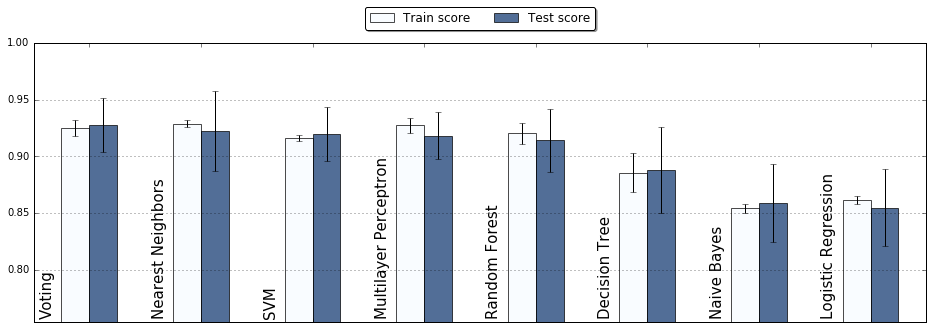

In [4]:
pol.plot()

In [5]:
for key, val in pol.confusions.items():
    print(key)
    print('Test')
    print(val['test'])


Multilayer Perceptron
Test
[[ 236.   14.]
 [  26.  224.]]
Random Forest
Test
[[ 234.   16.]
 [  26.  224.]]
Voting
Test
[[ 234.   16.]
 [  20.  230.]]
SVM
Test
[[ 226.   24.]
 [  17.  233.]]
Nearest Neighbors
Test
[[ 236.   14.]
 [  24.  226.]]
Decision Tree
Test
[[ 227.   23.]
 [  32.  218.]]
Logistic Regression
Test
[[ 212.   38.]
 [  35.  215.]]
Naive Bayes
Test
[[ 213.   37.]
 [  34.  216.]]


In [20]:
#pol.predictions.head()
pol.predictions.sort_index(inplace=True)

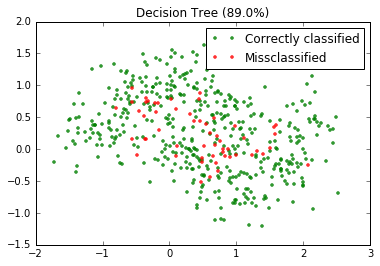

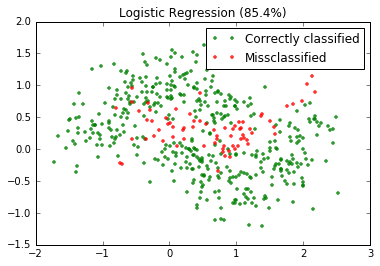

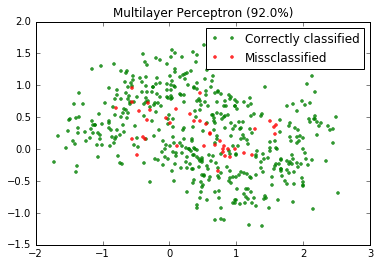

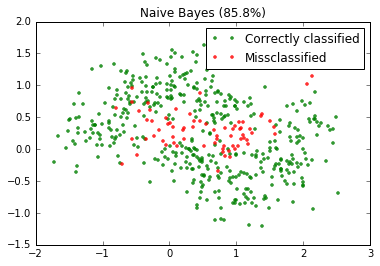

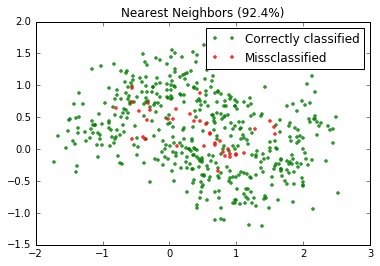

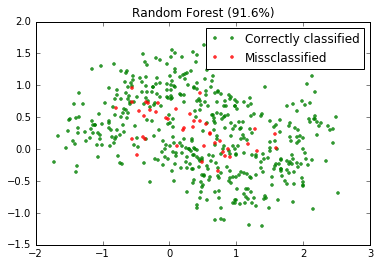

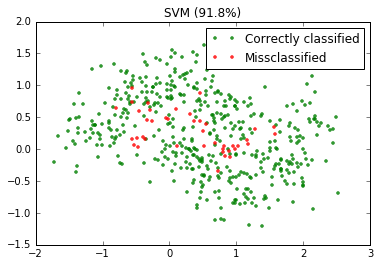

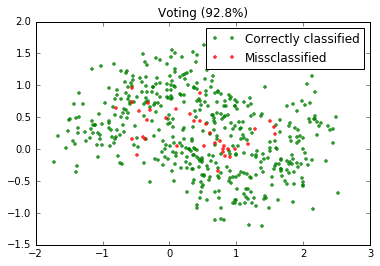

In [25]:
for key, pred in pol.predictions.items():
    plt.figure()
    missclass = np.where(label!=pred)[0]
    corrclass = np.where(label==pred)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'g.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'r.', alpha=0.8);
    plt.legend(['Correctly classified', 'Missclassified'])
    plt.title('{0} ({1}%)'.format(key, 100*len(corrclass)/len(pred)))